In [1]:
using SAC
using DSP
using PyPlot

In [2]:
data=SAC.read("Patricia100.sac")

INFO: Data are little-endian; byteswapping


SAC.SACtr:
    delta: 0.01
   depmin: -1.8321003e8
   depmax: 1.4286283e8
    scale: 1.0
        b: 0.0
        e: 25199.99
   depmen: -1.8947932e6
   nzyear: 2015
   nzjday: 296
   nzhour: 21
    nzmin: 0
    nzsec: 0
   nzmsec: 0
    nvhdr: 6
     npts: 2520000
   iftype: 1
   iztype: 9
    leven: true
   lpspol: true
   lovrok: true
   lcalda: false
 unused18: true
    kstnm: SHK2    
    kevnm: -12345  -12345  
   kcmpnm: HHZ     

In [3]:
p100=data.t;

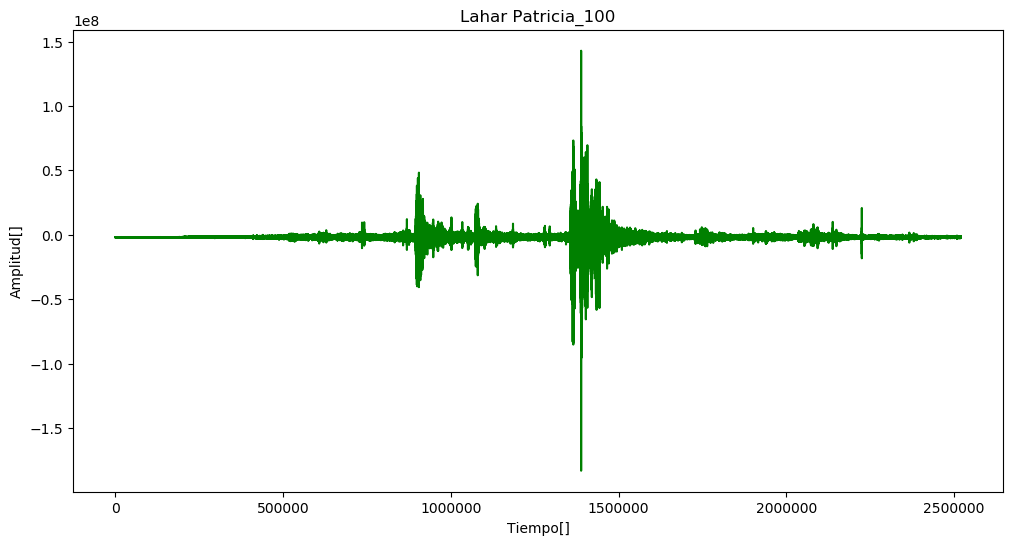

OMP: Warning #72: KMP_AFFINITY: affinity only supported for Intel(R) processors.
OMP: Warning #71: KMP_AFFINITY: affinity not supported, using "none".


PyObject <matplotlib.text.Text object at 0x0000000022F95BE0>

In [4]:
fig=figure(figsize=(12,6))
plot(data.t,"-g")
title("Lahar Patricia_100")
xlabel("Tiempo[]")
ylabel("Amplitud[]")

In [5]:
function Hil(x::Float32)
    y=zeros(length(x))
       for i=1:length(x)
        y[i]= x[i].*x[i]
    end
    return y
end

Hil (generic function with 1 method)

In [6]:
Hilb=abs.(hilbert(p100));

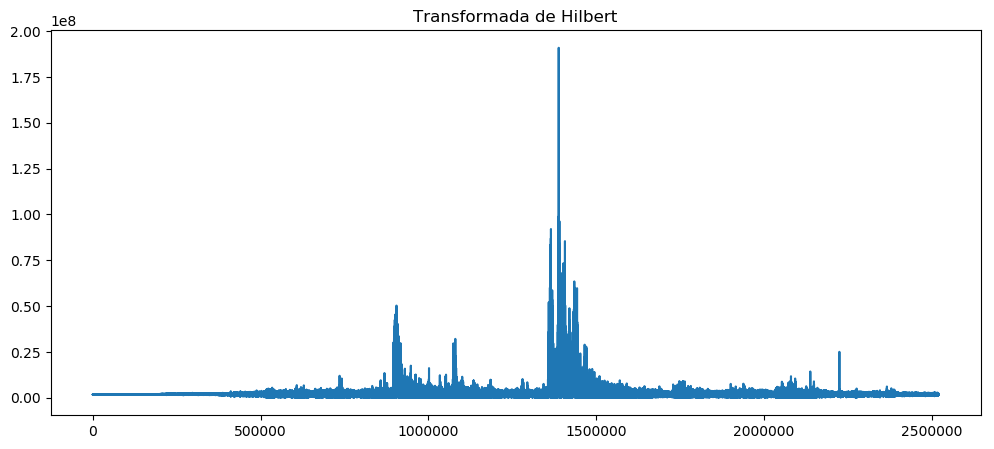

PyObject <matplotlib.text.Text object at 0x00000000235BE668>

In [7]:
fig= figure(figsize=(12,5))
plot(Hilb)
title("Transformada de Hilbert")

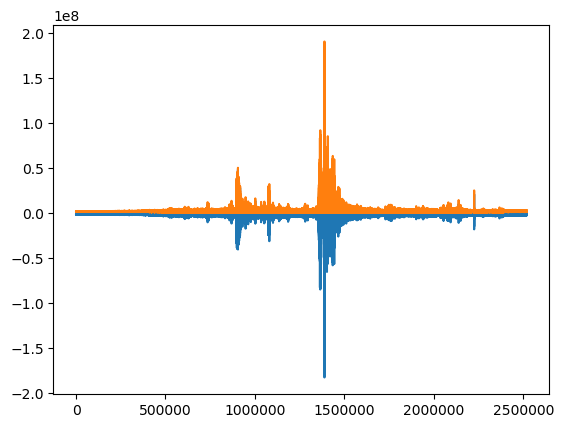

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002E068FD0>

In [8]:
plot(data.t)
plot(Hilb)

In [21]:
rmean!(data.t::SACtr)

LoadError: [91mTypeError: typeassert: expected SAC.SACtr, got Array{Float32,1}[39m

In [15]:
p100av=p100-av;

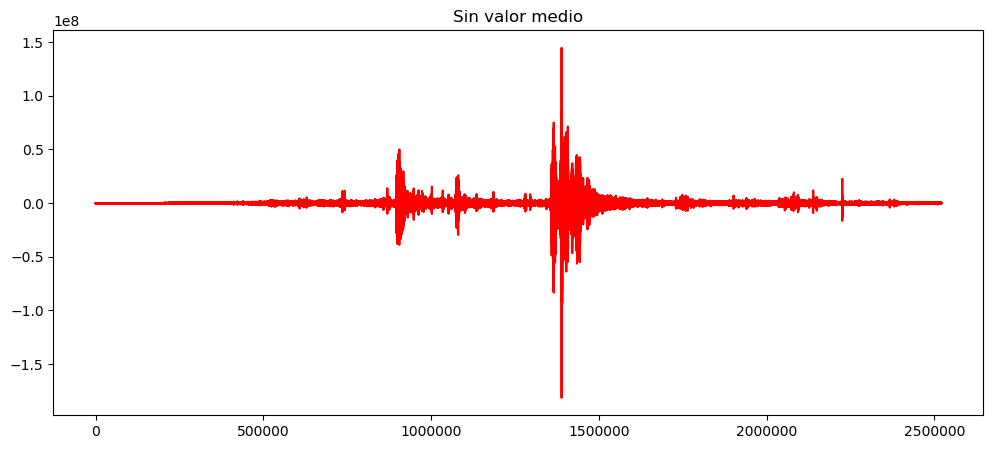

PyObject <matplotlib.text.Text object at 0x00000000258E99E8>

In [16]:
fig=figure(figsize=(12,5))
plot(p100av,"r")
title("Sin valor medio")

In [17]:
#Tendencia
seg=2520000 #(?)
sps=100
 t=collect(linspace(0,seg,sps*seg));
#ten=linreg(p100av,t)

In [65]:
#plot(ten)
#title("Línea de tendencia")

In [48]:
#envelope! para sacar la envolvente
#rtrend! para sacar tendencia

In [18]:
#tend=SAC.rtrend!(SAC.SACtr)

In [52]:
?SAC.rtrend!

```
rtrend!(::SACtr)
```

Remove the trend from a SAC trace in place.


In [19]:
#Transformada rápida de Fourier
tfr=abs.(fft(p100av,1));

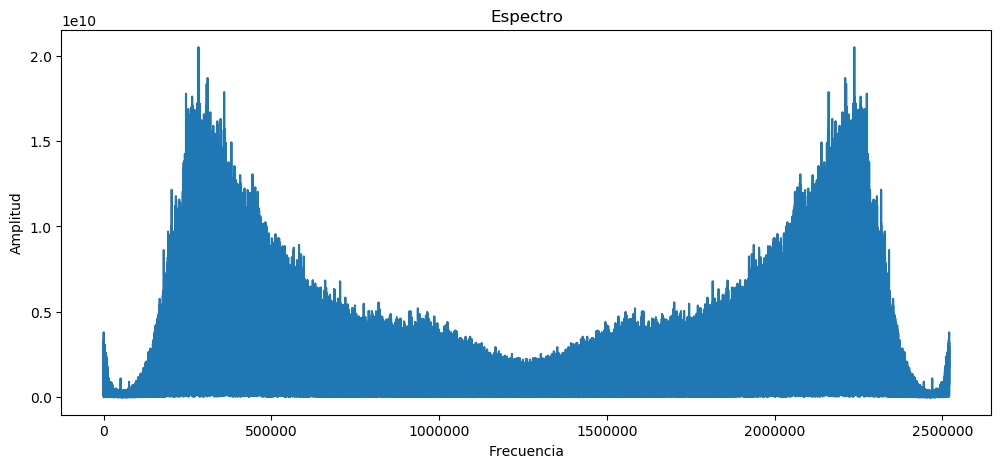

PyObject <matplotlib.text.Text object at 0x00000000255C0E80>

In [20]:
fig=figure(figsize=(12,5))
plot(tfr)
title("Espectro")
xlabel("Frecuencia")
ylabel("Amplitud")

In [21]:
frecvec=collect(linspace(0,sps,sps*seg));
length(frecvec)

252000000

In [73]:
#plot(frecvec[1:126000000],tfr[1:126000000])

In [76]:
sp=DSP.Periodograms.spectrogram(tfr);

In [39]:
tt = collect(Date(2015,1,1):Dates.Month(1):Date(now()))

35-element Array{Date,1}:
 2015-01-01
 2015-02-01
 2015-03-01
 2015-04-01
 2015-05-01
 2015-06-01
 2015-07-01
 2015-08-01
 2015-09-01
 2015-10-01
 2015-11-01
 2015-12-01
 2016-01-01
 ⋮         
 2016-12-01
 2017-01-01
 2017-02-01
 2017-03-01
 2017-04-01
 2017-05-01
 2017-06-01
 2017-07-01
 2017-08-01
 2017-09-01
 2017-10-01
 2017-11-01

In [40]:
xt = randn(length(tt))

35-element Array{Float64,1}:
  0.203217 
 -1.16098  
 -0.57763  
  0.359118 
  0.0801013
 -0.354377 
 -1.70592  
  0.350036 
  0.647174 
  0.870411 
  0.671237 
  0.200642 
 -0.488091 
  ⋮        
 -0.23168  
 -1.3796   
 -0.558806 
  0.0703648
 -2.14591  
  0.309427 
  0.574007 
  0.44887  
 -1.01321  
  1.04928  
 -0.94729  
 -0.0287057

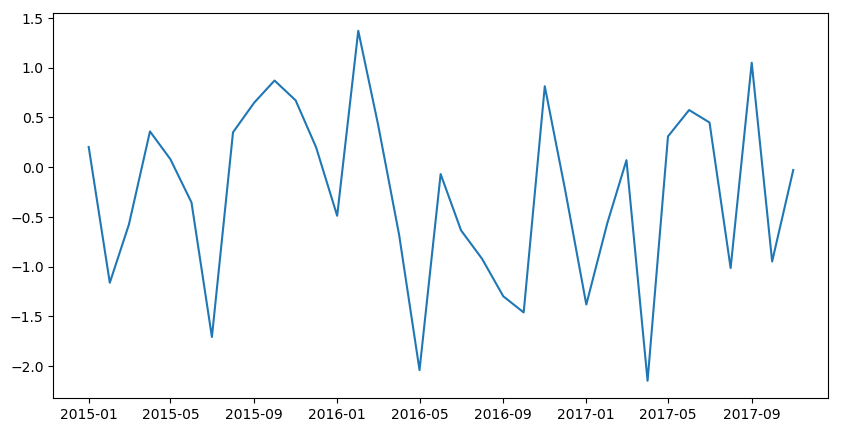

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000025C3ADD8>

In [42]:
fig = figure(figsize=(10,5))
plot(tt,xt)

In [43]:
typeof(data)

SAC.SACtr